In [1]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
from sklearn import tree
import matplotlib.pyplot as plt

In [2]:
df = pd.read_csv("winequality-red.csv", sep=";")

print("Dataset Loaded Successfully!")
df.head()

Dataset Loaded Successfully!


,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5


In [3]:
# Convert quality to categorical labels
def quality_to_class(q):
    if q <= 4:
        return 0   # Low
    elif q <= 6:
        return 1   # Medium
    else:
        return 2   # High

df['quality_class'] = df['quality'].apply(quality_to_class)

df[['quality', 'quality_class']].head()

,quality,quality_class
0,5,1
1,5,1
2,5,1
3,6,1
4,5,1


In [4]:
X = df.drop(["quality", "quality_class"], axis=1)
y = df["quality_class"]

print("Feature Shape:", X.shape)
print("Target Shape:", y.shape)

Feature Shape: (1599, 11)
Target Shape: (1599,)


In [5]:
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)

print("Data split successful!")

Data split successful!


In [6]:
classifier = DecisionTreeClassifier(criterion="gini", random_state=42)

classifier.fit(X_train, y_train)

print("Decision Tree Classifier trained successfully!")

Decision Tree Classifier trained successfully!


In [7]:
y_pred = classifier.predict(X_test)

y_pred[:10]

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1], dtype=int64)

In [8]:
acc = accuracy_score(y_test, y_pred)
cm = confusion_matrix(y_test, y_pred)
cr = classification_report(y_test, y_pred)

print("Accuracy:", acc)
print("\nConfusion Matrix:\n", cm)
print("\nClassification Report:\n", cr)

Accuracy: 0.784375

Confusion Matrix:
 [[  1  10   0]
 [ 13 222  27]
 [  1  18  28]]

Classification Report:
               precision    recall  f1-score   support

           0       0.07      0.09      0.08        11
           1       0.89      0.85      0.87       262
           2       0.51      0.60      0.55        47

    accuracy                           0.78       320
   macro avg       0.49      0.51      0.50       320
weighted avg       0.80      0.78      0.79       320



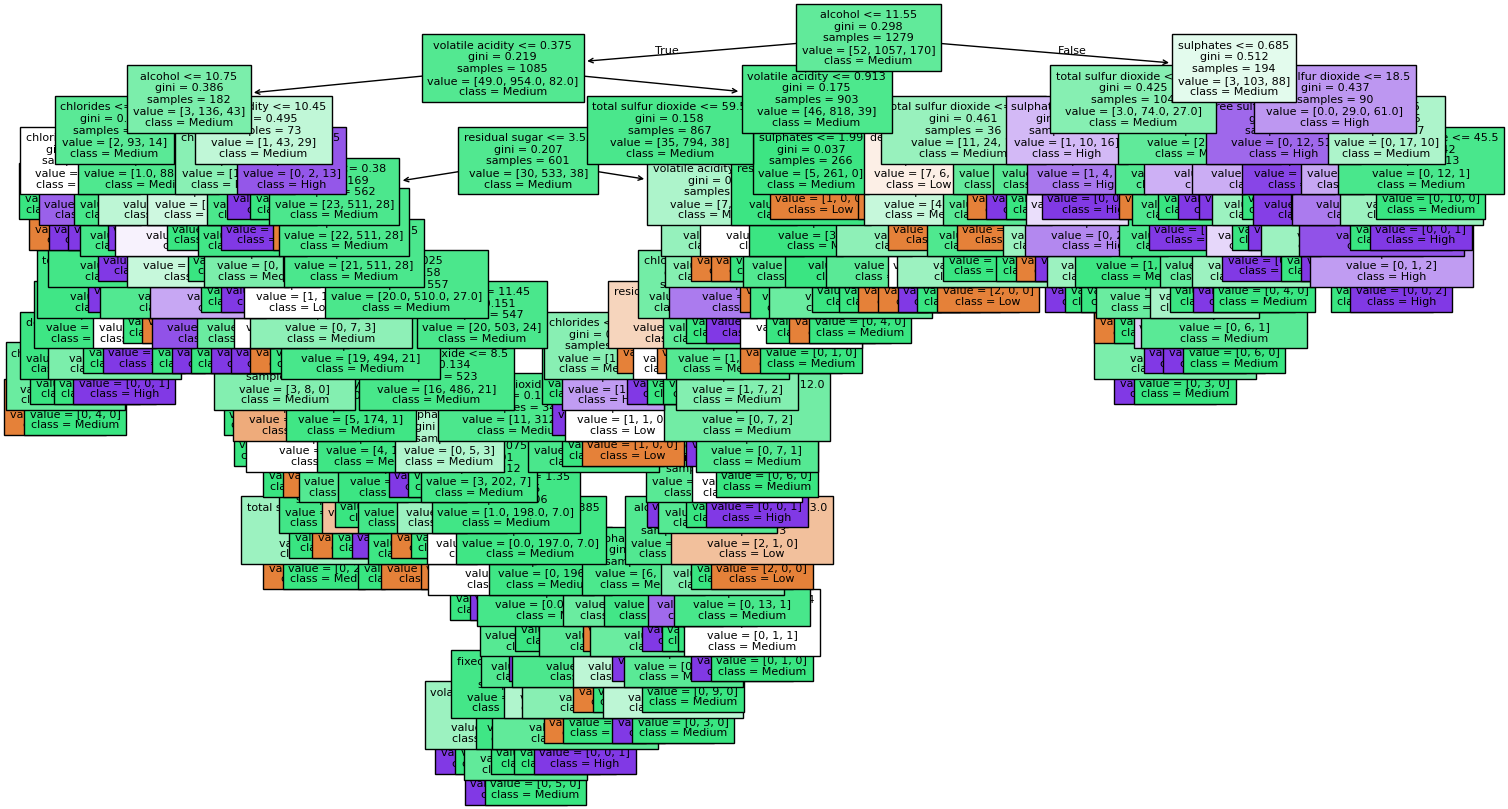

In [9]:
plt.figure(figsize=(18, 10))
tree.plot_tree(
    classifier,
    feature_names=X.columns,
    class_names=["Low", "Medium", "High"],
    filled=True,
    fontsize=8
)
plt.show()